<a href="https://colab.research.google.com/github/LefterisBailis/Tomato-Disease-Classifier/blob/main/tomato_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

['train', 'valid']

In [ ]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "valid")
print(os.listdir(test_path))

['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [ ]:
from glob import glob
folders = glob("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*")

Text(0.5, 1.0, 'Bacterial Spot')

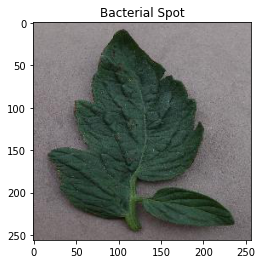

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

In [ ]:
SIZE = [224, 224,3]
BATCH_SIZE = 32

learning_rate = 0.0001

In [ ]:
train_datagen_mnetv2 = ImageDataGenerator(rescale=1./255)
test_datagen_mnetv2 = ImageDataGenerator(rescale=1./255)
seed =random.randint(1, 1000)

In [ ]:
training_set_mnetv2 = train_datagen_mnetv2.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=True)

Found 18345 images belonging to 10 classes.


In [ ]:
testing_set_mnetv2= test_datagen_mnetv2.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=False)

Found 4585 images belonging to 10 classes.


In [ ]:
for image_batch, label_batch in training_set_mnetv2:
    break
image_batch.shape, label_batch.shape

((16, 224, 224, 3), (16, 10))

In [ ]:
IMG_SHAPE = (224,224,3)
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=SIZE )

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 128)         1474688   
                                                                 
 dropout (Dropout)           (None, 5, 5, 128)         0         
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 3,733,962
Trainable params: 1,475,978
Non-

In [ ]:
history=model.fit_generator(training_set_mnetv2,
                       validation_data=testing_set_mnetv2,
                       epochs=10,
                       
                     )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
1147/1147 [==============================] - 4477s 4s/step - loss: 0.5863 - accuracy: 0.8010 - val_loss: 0.4629 - val_accuracy: 0.8451
Epoch 2/10
1147/1147 [==============================] - 813s 709ms/step - loss: 0.2884 - accuracy: 0.9020 - val_loss: 0.3108 - val_accuracy: 0.8966
Epoch 3/10
1147/1147 [==============================] - 796s 694ms/step - loss: 0.1943 - accuracy: 0.9303 - val_loss: 0.3019 - val_accuracy: 0.9067
Epoch 4/10
1147/1147 [==============================] - 789s 688ms/step - loss: 0.1434 - accuracy: 0.9525 - val_loss: 0.3067 - val_accuracy: 0.9071
Epoch 5/10
1147/1147 [==============================] - 792s 691ms/step - loss: 0.1093 - accuracy: 0.9626 - val_loss: 0.4011 - val_accuracy: 0.8925
Epoch 6/10
1147/1147 [==============================] - 798s 696ms/step - loss: 0.0832 - accuracy: 0.9704 - val_loss: 0.2690 - val_accuracy: 0.9191
Epoch 7/10
1147/1147 [==============================] - 780s 680ms/step - loss: 0.0664 - accuracy: 0.9778 - val_lo

In [ ]:
model.save("/content/drive/MyDrive/mobile_tomato.h5")

NameError: ignored

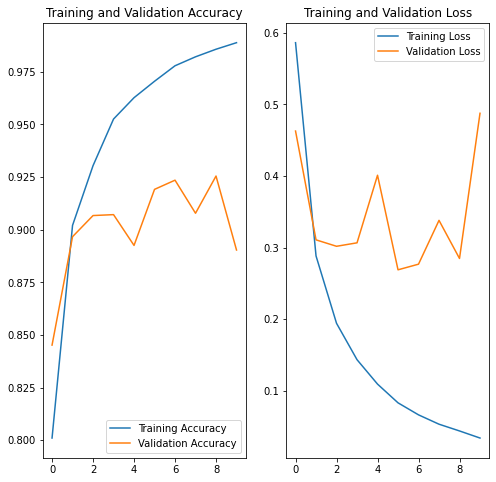

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = tf.concat([y for x, y in testing_set_mnetv2], axis=0)
print("True classes:")
print(y_true)

print("Predicted classes:")
y_pred = model.predict(testing_set_mnetv2)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

confusion = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n')
print(confusion)

In [ ]:
class_names = ['Bacterial_spot','Early_blight','Late_blight','Leaf_Mold','Septoria_leaf_spot','Spider_mites Two-spotted_spider_mite','Target_Spot','Yellow_Leaf_Curl_Virus',
               'mosaic_virus','healthy']

In [ ]:

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['Bacterial_spot','Early_blight','Late_blight','Leaf_Mold','Septoria_leaf_spot','Spider_mites Two-spotted_spider_mite','Target_Spot','Yellow_Leaf_Curl_Virus',
               'mosaic_virus','healthy']
plot_confusion_matrix(cm=confusion, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/MyDrive/tomato_mobilenet.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp7xsu7o7b/assets


INFO:tensorflow:Assets written to: /tmp/tmp7xsu7o7b/assets
